## Final Project Submission

Please fill out:
* Student name: Anthony Nene
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Rose Delilah, Asha Deen, Noah Kandie, Faith Rotich
* Blog post URL:


# Objectives
    -Use data analytics skills acquired to identify the top 10 movies in terms of ratings, number of viewers and total revenue
    -Use visualization techniques to present the above in graphs
    -Recommend the best genre of movie in which to venture into

In [131]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [102]:
#lets open and inspect our data files
dfbom = pd.read_csv('/Users/user/Phase1_Project/Movie_Analysis_Microsoft/dsc-phase-1-project/zippedData/bom.movie_gross.csv')
dfbom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [103]:
dftitlebasics = pd.read_csv("/Users/user/Phase1_Project/Movie_Analysis_Microsoft/dsc-phase-1-project/zippedData/imdb.title.basics.csv.gz")
dftitlebasics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [104]:
dftitleratings = pd.read_csv('/Users/user/Phase1_Project/Movie_Analysis_Microsoft/dsc-phase-1-project/zippedData/imdb.title.ratings.csv.gz')
dftitleratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [105]:
#checking missing values on dfbom
dfbom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [106]:
dfbom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [107]:
#replacing missing values with the mean
dfbom['domestic_gross'].fillna(dfbom['domestic_gross'].mean(), inplace= True)

In [108]:
dfbom.isnull().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [109]:
dfbom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [110]:
#we want to add a column that sums up the foreign gross and the domestic gross to a new column called total gross
#but first we have to cnvert the column foreign gross into a float to succed with the above step
dfbom['foreign_gross'] = dfbom['foreign_gross'].str.replace(",","").apply(float)

dfbom['foreign_gross'].dtype

dtype('float64')

In [111]:
dfbom["total_gross"] = dfbom["domestic_gross"]+dfbom["foreign_gross"]
dfbom

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,NaN
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
3384,El Pacto,Sony,2500.0,NaN,2018,NaN
3385,The Swan,Synergetic,2400.0,NaN,2018,NaN


In [112]:
#for our second data set we check missing values first
dftitleratings.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [113]:
#we will also check for duplicates
dftitleratings.duplicated().value_counts()

False    73856
dtype: int64

In [114]:
dftitleratings.mean()

averagerating       6.332729
numvotes         3523.662167
dtype: float64

In [91]:
# add a movie name column in the ratigs table from the title basics table
extracted_col = dftitlebasics["primary_title"]
display(extracted_col)

0                                           Sunghursh
1                     One Day Before the Rainy Season
2                          The Other Side of the Wind
3                                     Sabse Bada Sukh
4                            The Wandering Soap Opera
                             ...                     
146139                            Kuambil Lagi Hatiku
146140    Rodolpho Teóphilo - O Legado de um Pioneiro
146141                                Dankyavar Danka
146142                                         6 Gunn
146143                 Chico Albuquerque - Revelações
Name: primary_title, Length: 146144, dtype: object

In [115]:
titleratings_df = dftitleratings.join(extracted_col)
display(titleratings_df)

,tconst,averagerating,numvotes,primary_title
0,tt10356526,8.3,31,Sunghursh
1,tt10384606,8.9,559,One Day Before the Rainy Season
2,tt1042974,6.4,20,The Other Side of the Wind
3,tt1043726,4.2,50352,Sabse Bada Sukh
4,tt1060240,6.5,21,The Wandering Soap Opera
...,...,...,...,...
73851,tt9805820,8.1,25,MarchFourth Marching Band in China
73852,tt9844256,7.5,24,El Bumbún
73853,tt9851050,4.7,14,70 Acres in Chicago: Cabrini Green
73854,tt9886934,7.0,5,Amante de lo ajeno


In [116]:
#on our new table titleratings_df, we'd like to add the domestic gross revenue to our data set
extracted_col2 = dfbom["total_gross"]
display(extracted_col2)

0       1.067000e+09
1       1.025500e+09
2       9.603000e+08
3       8.283000e+08
4       7.526000e+08
            ...     
3382             NaN
3383             NaN
3384             NaN
3385             NaN
3386             NaN
Name: total_gross, Length: 3387, dtype: float64

In [94]:
movie_data = titleratings_df.join(extracted_col2)
display(movie_data)

,tconst,averagerating,numvotes,primary_title,total_gross
0,tt10356526,8.3,31,Sunghursh,1.067000e+09
1,tt10384606,8.9,559,One Day Before the Rainy Season,1.025500e+09
2,tt1042974,6.4,20,The Other Side of the Wind,9.603000e+08
3,tt1043726,4.2,50352,Sabse Bada Sukh,8.283000e+08
4,tt1060240,6.5,21,The Wandering Soap Opera,7.526000e+08
...,...,...,...,...,...
73851,tt9805820,8.1,25,MarchFourth Marching Band in China,NaN
73852,tt9844256,7.5,24,El Bumbún,NaN
73853,tt9851050,4.7,14,70 Acres in Chicago: Cabrini Green,NaN
73854,tt9886934,7.0,5,Amante de lo ajeno,NaN


In [117]:
movie_data.isnull().sum()

tconst           0
averagerating    0
numvotes         0
primary_title    0
total_gross      0
dtype: int64

In [96]:
movie_data.duplicated().value_counts()

False    73856
dtype: int64

In [118]:
# we'd like to replace the missing values in the total_gross column with the mean as below
movie_data['total_gross'] = movie_data['total_gross'].fillna(movie_data['total_gross'].mean())
display(movie_data)

,tconst,averagerating,numvotes,primary_title,total_gross
0,tt10356526,8.3,31,Sunghursh,1.067000e+09
1,tt10384606,8.9,559,One Day Before the Rainy Season,1.025500e+09
2,tt1042974,6.4,20,The Other Side of the Wind,9.603000e+08
3,tt1043726,4.2,50352,Sabse Bada Sukh,8.283000e+08
4,tt1060240,6.5,21,The Wandering Soap Opera,7.526000e+08
...,...,...,...,...,...
73851,tt9805820,8.1,25,MarchFourth Marching Band in China,1.215954e+08
73852,tt9844256,7.5,24,El Bumbún,1.215954e+08
73853,tt9851050,4.7,14,70 Acres in Chicago: Cabrini Green,1.215954e+08
73854,tt9886934,7.0,5,Amante de lo ajeno,1.215954e+08


In [119]:
movie_data.isnull().sum()

tconst           0
averagerating    0
numvotes         0
primary_title    0
total_gross      0
dtype: int64

In [120]:
#we would also like to add a genre column to our movie_data file so as to have a complete data set
#first we begin by ectracting the column "genres" from our table titlebasics
extracted_col3 = dftitlebasics["genres"]

display(extracted_col3)

0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                     NaN
146143             Documentary
Name: genres, Length: 146144, dtype: object

In [121]:
movie_data = movie_data.join(extracted_col3)

In [122]:
display(movie_data)

,tconst,averagerating,numvotes,primary_title,total_gross,genres
0,tt10356526,8.3,31,Sunghursh,1.067000e+09,"Action,Crime,Drama"
1,tt10384606,8.9,559,One Day Before the Rainy Season,1.025500e+09,"Biography,Drama"
2,tt1042974,6.4,20,The Other Side of the Wind,9.603000e+08,Drama
3,tt1043726,4.2,50352,Sabse Bada Sukh,8.283000e+08,"Comedy,Drama"
4,tt1060240,6.5,21,The Wandering Soap Opera,7.526000e+08,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
73851,tt9805820,8.1,25,MarchFourth Marching Band in China,1.215954e+08,"Documentary,Music"
73852,tt9844256,7.5,24,El Bumbún,1.215954e+08,Drama
73853,tt9851050,4.7,14,70 Acres in Chicago: Cabrini Green,1.215954e+08,"Documentary,History,News"
73854,tt9886934,7.0,5,Amante de lo ajeno,1.215954e+08,Drama


In [123]:
#checking for null values in our new data set
movie_data.isnull().sum()

tconst              0
averagerating       0
numvotes            0
primary_title       0
total_gross         0
genres           1790
dtype: int64

In [126]:
#the next step would be to check the correlation between several variables
#first we will check the correlation between average rating and the number of votes.
# in this case we will assume that the number of voters also represent the number of views

print(movie_data['averagerating'].corr(movie_data['numvotes']))

#secondly we will check the correlation between the average rating and total gross earnings

print(movie_data['averagerating'].corr(movie_data['total_gross']))

#thirdly we will check the correlation between the number of views/votes and the total earnings
print(movie_data['numvotes'].corr(movie_data['total_gross']))


0.044478094401983824
-0.002763760551460171
0.015714448432418923


# first observation
from the above result, we can conclude that there's a weak positive correlation between 
the average rating and the number of votes. This is to say that an increase in the number of votes will not necessarily
increase the ratings of a particular movie.

# second observation
We have also observed that there's a very weak negative correlation 
between the average rating and the total gross earnings. This suggests that an increase in ratings
does not necessarily contribute to an increase in total earnings, rather the opposite might be true according
to the above result.

# third observation
with a correlation coefficient of 0.015, there is a very weak positive correlation between
the number of views and the total gross earnings. This translates to very minimal effect on the total gross earnings
with an increase or decrease in the number of viewers

In [129]:
#from the above three observations, we can conclude that these three variables do not affect each other significantly
#we will use the number of votes as our determinant on the success of a movie.
#we first start by sorting our data from the movie with the highest views to the lowest

movie_data = movie_data.sort_values(['numvotes'], ascending = False)
movie_data

,tconst,averagerating,numvotes,primary_title,total_gross,genres
63498,tt1375666,8.8,1841066,Dutch National Ballet Gala,1.215954e+08,Music
8738,tt1345836,8.4,1387769,Grabbers,1.215954e+08,"Comedy,Horror,Sci-Fi"
24920,tt0816692,8.6,1299334,Subjective Expressions,1.215954e+08,Drama
38058,tt1853728,8.4,1211405,Welcome Aboard,1.215954e+08,Drama
48221,tt0848228,8.1,1183655,The Prisonaires,1.215954e+08,"Biography,Documentary,History"
...,...,...,...,...,...,...
39180,tt8050582,8.0,5,Lyubov s aktsentom,1.215954e+08,Comedy
33886,tt6449270,4.0,5,Afric Hotel,1.215954e+08,Documentary
22243,tt3819584,7.6,5,Vessel,1.215954e+08,"Drama,Horror"
49605,tt2136926,5.8,5,The New Village,1.215954e+08,"Drama,History"


In [130]:
#from the data set, we will now use our top 10 records to perform our analysis
movie_data_df = movie_data.head(10)
movie_data_df

,tconst,averagerating,numvotes,primary_title,total_gross,genres
63498,tt1375666,8.8,1841066,Dutch National Ballet Gala,1.215954e+08,Music
8738,tt1345836,8.4,1387769,Grabbers,1.215954e+08,"Comedy,Horror,Sci-Fi"
24920,tt0816692,8.6,1299334,Subjective Expressions,1.215954e+08,Drama
38058,tt1853728,8.4,1211405,Welcome Aboard,1.215954e+08,Drama
48221,tt0848228,8.1,1183655,The Prisonaires,1.215954e+08,"Biography,Documentary,History"
39356,tt0993846,8.2,1035358,Spirit Stalkers,1.215954e+08,Horror
3140,tt1130884,8.1,1005960,Untitled Las Vegas Documentary,9.530000e+07,Documentary
25777,tt2015381,8.1,948394,Perfect Sisters,1.215954e+08,"Crime,Drama,Thriller"
60518,tt1431045,8.0,820847,Cecilia Bergman Chaves,1.215954e+08,Documentary
63506,tt1392170,7.2,795227,A Musical Journey: On the Road to Bhutan,1.215954e+08,"Documentary,Music,Musical"


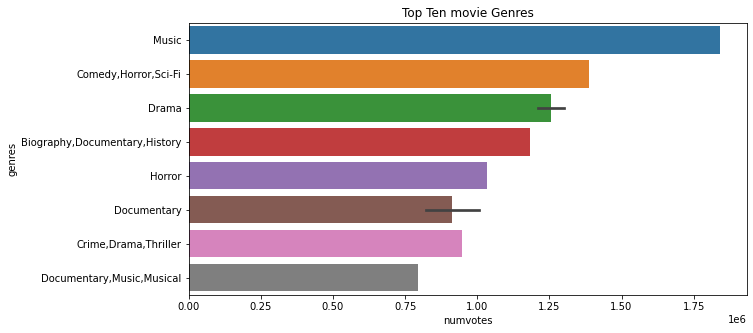

In [134]:
#From the above table, we can observe that the top ten movies also have very high ratings out of 10.
#lets represent the above info on a graph for better visualization
#We will start by comparing the number of votes and the genre
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=movie_data_df['numvotes'],y=movie_data_df['genres'])

plt.xlabel('numvotes') 
plt.ylabel('genres') 
plt.title('Top Ten movie Genres')
plt.show()

# Conclusion
In conclusion, the visual representation above shows the top ten movie genres that the Microsoft team should venture into.
First is because of the relatively high ratings as compared to the number of viewers who voted for the movie with the least having a rating of 7.2.
Secondly, the above genres seem to be raking in high earnings both domestically and in foreign countries.

# Recommendations
Microsoft should focus more on the music genres movies since they contain the highest number of views and also rate very highly among the public.
In return, the music genre is one of the highest revenue generating genres and there's a business opportunity for Microsoft to tap into 
